In [1]:
import igraph as ig

import numpy as np
import os
#Visualizations
import matplotlib.pyplot as plt
import random
from datetime import datetime
import itertools

import swnHeatKernels as swnN 
from scipy import linalg
import helperFunc as hf
import swnMetrics as swn
import centrality as ce
import distributions as dstr

from scipy.stats.stats import pearsonr 
from numpy.polynomial.polynomial import polyfit
from scipy import stats
from sklearn.utils import resample


## Functions

In [2]:
def getCorrBootstrap(QAll,tauTupleList,p,rewiringsTuple =(4000,4000),samples=100,repetitions = 1000):
    
    weightDist = ['normal','lognormal']
    r2 = {}; pVal = {}; bias = {}; slope = {}; 

    for wD in weightDist:
        lenVars = len(tauTupleList[(wD)])
        r2[wD,p] = np.zeros((repetitions,lenVars)); pVal[wD,p] = np.zeros((repetitions,lenVars)) 
        bias[wD,p] = np.zeros((repetitions,lenVars)); slope[wD,p] = np.zeros((repetitions,lenVars))
        for ind,tauTuple in enumerate(tauTupleList[(wD)]):
        
            Q0,Q1,Q2 = QAll[wD][p,tauTuple,rewiringsTuple]
            for reps in np.arange(repetitions): 
                # prepare bootstrap sample
                Q1Sample,Q2Sample = resample(Q1, Q2, replace=True, n_samples=samples)
                slope[wD,p][reps,ind], bias[wD,p][reps,ind], r, pVal[wD,p][reps,ind], std_err = stats.linregress(Q1Sample,Q2Sample)
                r2[wD,p][reps,ind] = r**2
    
    return r2,pVal,bias,slope

## Load Q values

In [3]:
rewiringsTuple= (4000,4000)
weightDist = ['normal','lognormal']
p = 0.2

directoryQLoad ='data/ModularityValues/2tauRewirings/'
descr = 'Q0Q4000Q8000p0.2'
filePathQLoad = directoryQLoad + descr+'.pckl'
(QAll,tauTupleList) = hf.loadVar(filePathQLoad) 



In [4]:
r2,pVal,bias,slope = getCorrBootstrap(QAll,tauTupleList,p,rewiringsTuple)

In [5]:
####################to GET THE X-AXIS TAUDIFF##############
w = 'normal'
lengthTauDiff = len(tauTupleList[(w)])
tauDiff = np.zeros(lengthTauDiff)
for indT in np.arange(lengthTauDiff):
    tauDiff[indT] = tauTupleList[(w)][indT][1] - tauTupleList[(w)][indT][0]
#######################################
    

ms = 8    
LW = 2
xLabel = 'tau (away from transition)'
colorsPlot = [ 'orange', 'green']
shapePoint = ['-s','-v']
shapePointNoLine = ['s','v']

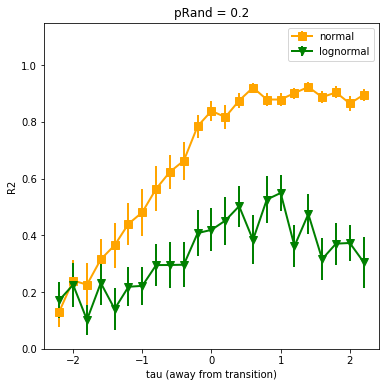

In [6]:
#R2

filePathPlot = 'plotData/correlations/R2Bootstrap2Rewires.eps'
#filePathPlot = False
ylabel = 'R2'

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure(); 
ax = fig.add_subplot(1,1, 1)
for ind,wD in enumerate(weightDist):

    ttl = 'pRand = '+ str(p)
    plt.title(ttl)
    plt.xlabel(xLabel)
    plt.ylim((0, 1.15))
    plt.ylabel(ylabel)

    r2Std = np.std(r2[wD,p], axis=0)
    r2Mean = np.mean(r2[wD,p], axis=0)
    ax.errorbar(tauDiff, r2Mean, r2Std, mfc=colorsPlot[ind], mec=colorsPlot[ind], marker=shapePointNoLine[ind],markersize=ms,
                color=colorsPlot[ind],linewidth=LW, label=wD)       
    plt.legend()
    


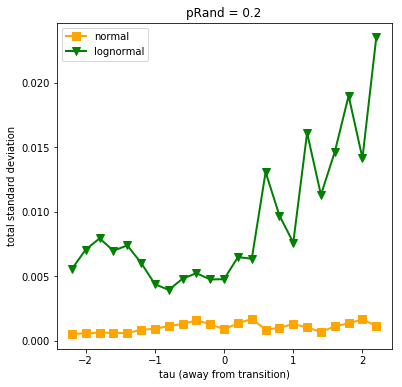

In [7]:
filePathPlot = 'plotData/correlations/varLinearFitBootstrap2Rewires.eps'
ylabel = 'total standard deviation'

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure(); 
ax = fig.add_subplot(1,1, 1)
for ind,wD in enumerate(weightDist):

    ttl = 'pRand = '+ str(p)
    plt.title(ttl)
    plt.xlabel(xLabel)
    plt.ylabel(ylabel)

    biasStd = np.std(bias[wD,p], axis=0)**2
    slopeStd = np.std(slope[wD,p], axis=0)**2
    totalStd = biasStd + slopeStd
    plt.plot(tauDiff, totalStd, mfc=colorsPlot[ind], mec=colorsPlot[ind], marker=shapePointNoLine[ind],markersize=ms,
                color=colorsPlot[ind],linewidth=LW, label=wD)       
    plt.legend()
